# To make different wordcloud in python

### Make wordcloud

In [2]:
import stylecloud
from PIL import Image
from stop_words import get_stop_words

In [3]:
stylecloud.gen_stylecloud(file_path='speech.txt',
                          icon_name= "fas fa-apple-alt" )

In [4]:
stylecloud.gen_stylecloud(file_path='speech.txt',
                          icon_name='fas fa-apple-alt',
                          colors='white',
                          background_color='black',
                          output_name='apple-1.png',
                          collocations=False)

In [5]:
# it has stopwords by default but we can customize it
from stop_words import get_stop_words

stop_words = get_stop_words('english')
stop_words.append('my_new_stop_word')
stop_words.remove('my_new_stop_word')

### stopwords

In [6]:
# wordcloud without stopwords

stylecloud.gen_stylecloud(file_path='speech.txt',
                          icon_name='fas fa-apple-alt',
                          colors='white',
                          background_color='black',
                          output_name='apple-2.png',
                          collocations=False,
                         custom_stopwords = stop_words)

In [7]:
# wordcloud without stopwords and palette/html colors

stylecloud.gen_stylecloud(file_path='speech.txt',
                          icon_name= "fas fa-apple-alt",
                          # colors = '#434FCF', #html colors
                          palette="cartocolors.qualitative.Pastel_3", #palettes
                          background_color="black",
                          output_name='apple-3.png',
                          collocations=False, #collocation helps to disperse text
                          custom_stopwords=stop_words)

### Adding own image 

In [8]:
from wordcloud import WordCloud , ImageColorGenerator # make wordcloud
from PIL import Image # load the image
import numpy as np # get mask of image
import matplotlib.pyplot as plt # plot the wordcloud

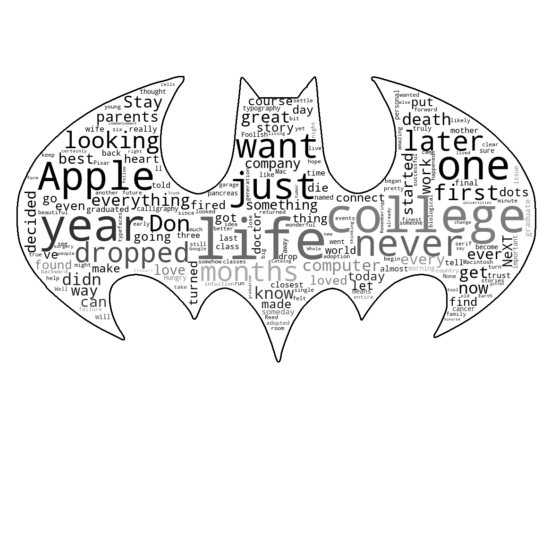

In [11]:
# create the wordcloud(wc)

my_mask = np.array(Image.open('batman-logo.png'))

wc = WordCloud(background_color = 'white',
              mask = my_mask,
              collocations = False,
              width = 600,
              height =300,
              contour_width=3,
              contour_color='black',
              stopwords=stop_words)

# tead txt file
with open('speech.txt', 'r',encoding="utf8") as txt_file:
    text = txt_file.read()
# make wordcloud
wc.generate(text)


# get colors of the png file and give that color to the wc
image_colors = ImageColorGenerator(my_mask)
wc.recolor(color_func=image_colors)


#plotting
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
wc.to_file("wordcloud_image.png")
plt.show()
